In [1]:
import importlib
import gui
import people
import astar
import main_functions
importlib.reload(gui)
importlib.reload(people)
importlib.reload(astar)
importlib.reload(main_functions)
from gui import GUI
from people import PeopleList
from main_functions import group_num_calculator,one_simulation
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd


# Test Model

In [3]:
# [(start_boundary), (end_boundary), (door), (start_obstacle1), (end_obstacle1), (start_obstacle2), (end_obstacle2)...]
# Note the boader of room is of size 1, hence the real room is (1,1)->(26,16)
#barrier_set = [(0, 0), (27, 17), (26, 8), (20, 4), (23, 7), (20, 10), (23, 13)]
#barrier_set = [(0, 0), (27, 17), (26, 8), (22,6), (23, 11)]
barrier_set = [(0, 0), (27, 17), (26, 8)]

seed = 41
delta_time = 0.005  # Timestrp
percent_threshold = 80  # Checkpoint: the percentage of people being moved out

initial_people_count = None
recorded_time = False

# Build GUI
gui = GUI()
gui.add_barrier(barrier_set)
gui.update_gui()

# Build PeopleList saving each people object
people_list = PeopleList(seed)
# Build direction matrix
people_list.direction_matrix(barrier_set)
# Assign groups
r_1 = 0.6 # ratio of 1-ped group
r_2 = 0.35 # ratio of 2-ped group
r_3 = 0.05 # ratio of 3-ped group
N = 15*9 # Total pedestrians
(n_1,n_2,n_3) = group_num_calculator(N, r_1, r_2, r_3)
group_split = {3: n_3, 2: n_2}
people_list.assign_groups(group_split,seed)


time = 0

# Initial each people
for people in people_list.list:
    gui.add_line(people, people_list.list, people.group_id)
    gui.add_oval(people.loc[0] - people.r, people.loc[1] - people.r,
                 people.loc[0] + people.r, people.loc[1] + people.r, people.id)
gui.update_gui()

initial_people_count = len(people_list.list)

# Move
# start_time = real_time.time() 

while people_list.list:
    i = 0
    while i < len(people_list.list):
        gui.del_line(people_list.list[i].group_id)
        gui.del_oval(people_list.list[i].id)

        if people_list.list[i].loc[0] > 1040 and people_list.list[i].loc[1] >300 and people_list.list[i].loc[1] <380:  # delete people if it goes out of room
            people_list.list.pop(i)
            continue
        i += 1

    # Check the percentage of people who have moved out
    remaining_people_count = len(people_list.list)
    moved_out_percentage = ((initial_people_count - remaining_people_count) / initial_people_count) * 100

    if not recorded_time and moved_out_percentage >= percent_threshold:
        print(f"Time when {percent_threshold}% of people moved out: {round(time, 3)} seconds") 
        recorded_time = True

    people_list.move(barrier_set, delta_time=delta_time,  A_p=2000, A_o=5000, B=-0.08, threshold_ped=1.2, threshold_obs=120,
                     threshold_group=2,q_A=1, beta1=0.4, beta2=0.2)  # ped movement

    for people in people_list.list:  # update position
        gui.add_oval(int(people.loc[0]) - people.r,
                     int(people.loc[1]) - people.r, int(people.loc[0]) + people.r,
                     int(people.loc[1]) + people.r, people.id)
        gui.add_line(people, people_list.list, people.group_id)

    # time = real_time.time() - start_time  # update time
    time += delta_time
    gui.update_time(str(round(time, 3)))
    gui.update_gui()

gui.start()


Time when 80% of people moved out: 26.3 seconds


In [1]:
r_1 = 0.6 # ratio of 1-ped group
r_2 = 0.35 # ratio of 2-ped group
r_3 = 0.05 # ratio of 3-ped group
N = 15*9 # Total pedestrians
barrier_set = [(0, 0), (27, 17), (26, 8), (20, 4), (23, 7), (20, 10), (23, 13)]
delta_time = 0.005
seed = 41
percent_threshold = 80
A_p=2000
A_o=5000
B=-0.08
beta1=0.4
beta2=0.2
time = one_simulation(barrier_set, percent_threshold,
                   r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                   N, delta_time, seed, gui_display=True)  


NameError: name 'one_simulation' is not defined

In [14]:
print(f"Time when 100% of people moved out: {time:.3f} seconds")

Time when 100% of people moved out: 57.735 seconds


In [17]:
# [(start_boundary), (end_boundary), (door), (start_obstacle1), (end_obstacle1), (start_obstacle2), (end_obstacle2)...]
# Note the boader of room is of size 1, hence the real room is (1,1)->(26,16)
barrier_set = [(0, 0), (27, 17), (26, 8), (22,6), (23, 11)]

seed = 60
delta_time = 0.005  # Timestrp
percent_threshold = 80  # Checkpoint: the percentage of people being moved out

initial_people_count = None
recorded_time = False

# Build GUI
gui = GUI()
gui.add_barrier(barrier_set)
gui.update_gui()

# Build PeopleList saving each people object
people_list = PeopleList(seed)
# Build direction matrix
people_list.direction_matrix(barrier_set)
# Assign groups
r_1 = 0.6 # ratio of 1-ped group
r_2 = 0.35 # ratio of 2-ped group
r_3 = 0.05 # ratio of 3-ped group
N = 15*9 # Total pedestrians
(n_1,n_2,n_3) = group_num_calculator(N, r_1, r_2, r_3)
group_split = {3: n_3, 2: n_2}
people_list.assign_groups(group_split,seed)


time = 0

# Initial each people
for people in people_list.list:
    gui.add_line(people, people_list.list, people.group_id)
    gui.add_oval(people.loc[0] - people.r, people.loc[1] - people.r,
                 people.loc[0] + people.r, people.loc[1] + people.r, people.id)
gui.update_gui()

initial_people_count = len(people_list.list)

# Move
# start_time = real_time.time() 

while people_list.list:
    i = 0
    while i < len(people_list.list):
        gui.del_line(people_list.list[i].group_id)
        gui.del_oval(people_list.list[i].id)

        if people_list.list[i].loc[0] > 1040 and people_list.list[i].loc[1] >300 and people_list.list[i].loc[1] <380:  # delete people if it goes out of room
            people_list.list.pop(i)
            continue
        i += 1

    # Check the percentage of people who have moved out
    remaining_people_count = len(people_list.list)
    moved_out_percentage = ((initial_people_count - remaining_people_count) / initial_people_count) * 100

    if not recorded_time and moved_out_percentage >= percent_threshold:
        print(f"Time when {percent_threshold}% of people moved out: {round(time, 3)} seconds") 
        recorded_time = True
        

    people_list.move(barrier_set, delta_time=delta_time,  A_p=2000, A_o=2000, B=-0.08, threshold_ped=1.2, threshold_obs=120,
                     threshold_group=2,q_A=1, beta1=0.5, beta2=3)  # ped movement

    for people in people_list.list:  # update position
        gui.add_oval(int(people.loc[0]) - people.r,
                     int(people.loc[1]) - people.r, int(people.loc[0]) + people.r,
                     int(people.loc[1]) + people.r, people.id)
        gui.add_line(people, people_list.list, people.group_id)

    # time = real_time.time() - start_time  # update time
    time += delta_time
    gui.update_time(str(round(time, 3)))
    gui.update_gui()

gui.start()


Time when 80% of people moved out: 31.54 seconds


In [18]:
time 

61.26500000001289

In [4]:
np.linspace(1,3.5,6)


array([1. , 1.5, 2. , 2.5, 3. , 3.5])

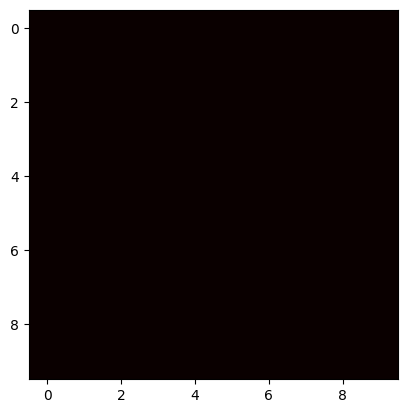

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 函数: 初始化数据
def init_data():
    data = np.zeros((10, 10))  # 创建一个10x10的矩阵，初始值为0
    return data

# 函数: 更新数据，这里我们简单模拟数据更新
def update_data(data):
    new_data = data + np.random.randn(10, 10)  # 给数据添加一些随机噪声
    return new_data

# 动画更新函数
def update(frame_num, img, data):
    new_data = update_data(data)  # 更新数据
    img.set_data(new_data)  # 设置新数据到图像
    data[:] = new_data  # 更新旧数据引用
    return img,

# 主函数设置
def main():
    # 初始化数据
    data = init_data()

    # 创建图表和轴
    fig, ax = plt.subplots()
    img = ax.imshow(data, cmap='hot', interpolation='nearest')

    # 创建动画
    ani = FuncAnimation(fig, update, fargs=(img, data), frames=100, interval=50, blit=True)

    # 显示图表
    plt.show()

# 调用主函数
if __name__ == "__main__":
    main()





In [7]:
beta_1_list = np.linspace(1000,2000,5)
beta_1_list 

array([1000., 1250., 1500., 1750., 2000.])

# Global Sensitive Analysis

# Local Sensitive Analysis

# Experiment

In [2]:
r_1 = 0.6 # ratio of 1-ped group
r_2 = 0.35 # ratio of 2-ped group
r_3 = 0.05 # ratio of 3-ped group
N = 15*9 # Total pedestrians
barrier_set = [(0, 0), (27, 17), (26, 8), (20, 4), (23, 7), (20, 10), (23, 13)]
delta_time = 0.005
seed = 41
percent_threshold = 80
A_p=2000
A_o=5000
B=-0.08
beta1=0.4
beta2=0.2
time = one_simulation(barrier_set, percent_threshold, 
                   r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                   N, delta_time, seed, gui_display=False)

Time when 80% of people moved out: 41.79 seconds


In [3]:
print(f"Time when 100% of people moved out: {time:.3f} seconds")

Time when 100% of people moved out: 57.735 seconds
